## Import Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

## Import Clean Table:

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/philippe2023/vanguard_analysis_ab_test/main/data/clean/final_df.csv")

In [3]:
# Ensure date_time is in datetime format
df['date_time'] = pd.to_datetime(df['date_time'])
df['year'] = pd.to_datetime(df['year'])
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'])

# Confirm data types
print(df.dtypes)

client_id                    int64
clnt_tenure_yr             float64
clnt_tenure_mnth           float64
clnt_age                   float64
gendr                       object
num_accts                  float64
bal                        float64
calls_6_mnth               float64
logons_6_mnth              float64
Variation                   object
visitor_id                  object
visit_id                    object
process_step                object
date_time           datetime64[ns]
year                datetime64[ns]
date                datetime64[ns]
time                datetime64[ns]
dtype: object


---

# Find Ideal Customer Analysis

### Analysis by Gender and Age Group

In [4]:
# Create age groups
age_bins = [0, 20, 30, 40, 50, 60, 70, float('inf')]
age_labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']
df['age_group'] = pd.cut(df['clnt_age'], bins=age_bins, labels=age_labels, right=False)

In [5]:
# Analyse gender distribution
gender_distribution = df['gendr'].value_counts(normalize=True) * 100
print("Gender Distribution (in %):")
print(gender_distribution)

Gender Distribution (in %):
M    33.772659
U    33.712842
F    32.511385
X     0.003113
Name: gendr, dtype: float64


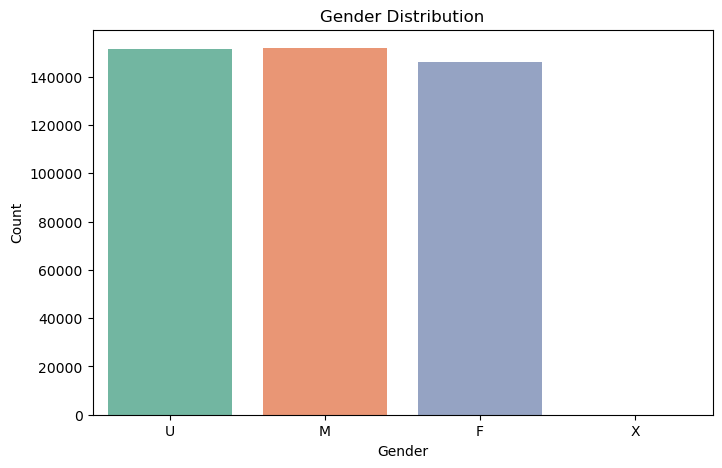

In [6]:
# Visualize Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gendr', palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [7]:
# Analyze gender distribution by age group
gender_age_group_distribution = df.groupby(['age_group', 'gendr']).size().unstack().fillna(0)
display(gender_age_group_distribution)

gendr,F,M,U,X
age_group,,,,
<20,1196,1313,5021,0
20-30,13615,17218,40454,3
30-40,22850,25591,27609,0
40-50,26166,27285,22593,5
50-60,38192,36392,29300,6
60-70,32006,30948,20837,0
70+,12180,13130,5794,0


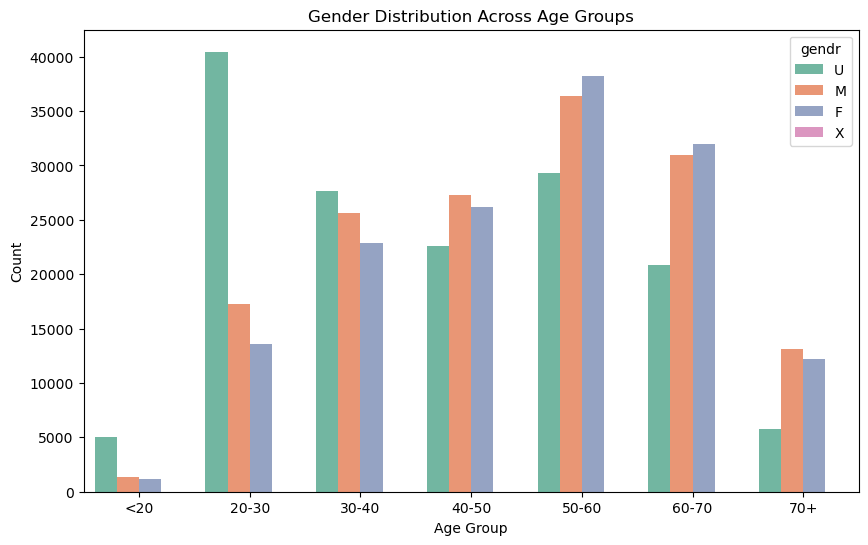

In [8]:
# Visualize Age Group Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='gendr', palette='Set2')
plt.title('Gender Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

### Analysis of Client's Tenure by age and gender:

In [9]:
# Grouping by gender and age group to analyze tenure
tenure_analysis = df.groupby(['gendr', 'age_group'])['clnt_tenure_mnth'].agg(['mean', 'median', 'max']).reset_index()

# Sorting to see which gender and age group has the longest average tenure
sorted_tenure = tenure_analysis.sort_values(by='max', ascending=False)

# Displaying the results
print("Tenure Analysis by Gender and Age Group:")
display(tenure_analysis)

print("\nSorted by Maximum Tenure:")
display(sorted_tenure)

Tenure Analysis by Gender and Age Group:


,gendr,age_group,mean,median,max
0,F,<20,192.526756,209.0,325.0
1,F,20-30,155.033639,140.0,449.0
2,F,30-40,159.903895,157.0,655.0
3,F,40-50,181.527861,178.0,668.0
4,F,50-60,189.746308,178.0,749.0
5,F,60-70,200.201743,185.0,667.0
6,F,70+,224.147126,203.0,668.0
7,M,<20,193.099010,197.0,532.0
8,M,20-30,155.312406,140.0,516.0
9,M,30-40,160.417412,156.0,596.0



Sorted by Maximum Tenure:


,gendr,age_group,mean,median,max
4,F,50-60,189.746308,178.0,749.0
10,M,40-50,182.018398,179.0,669.0
20,U,70+,107.736279,84.0,669.0
3,F,40-50,181.527861,178.0,668.0
6,F,70+,224.147126,203.0,668.0
5,F,60-70,200.201743,185.0,667.0
2,F,30-40,159.903895,157.0,655.0
12,M,60-70,200.477995,189.0,610.0
11,M,50-60,195.178885,188.0,610.0
13,M,70+,232.459482,225.0,602.0


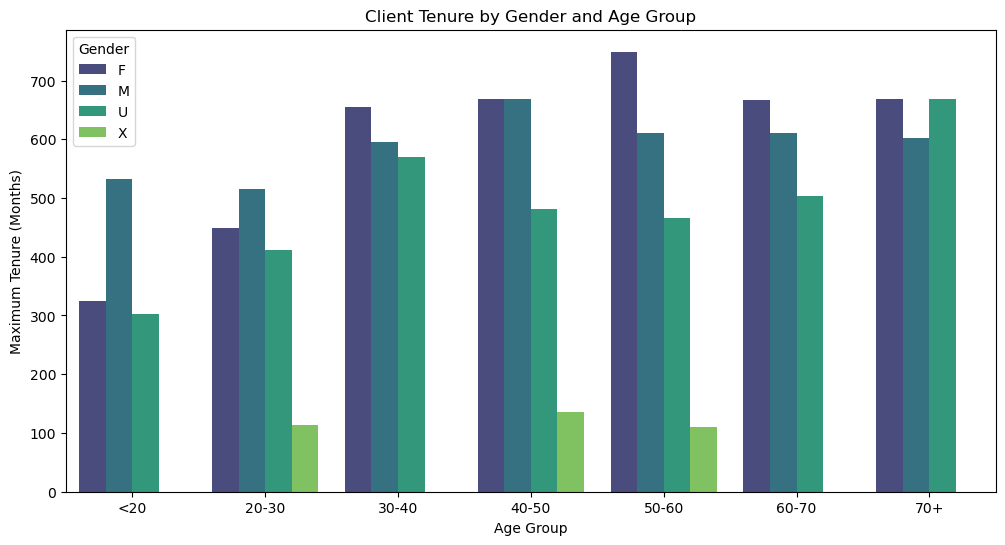

In [10]:
# Bar plot for maximum tenure by gender and age group
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='max', hue='gendr', data=sorted_tenure, palette='viridis')
plt.title('Client Tenure by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Maximum Tenure (Months)')
plt.legend(title='Gender')
plt.show()

### Result from Customer Metrics:
- The distribution shows a relatively balanced gender split among users, with males (M) representing around 33.8%, females (F) around 32.5%, and users with undefined or unclassified genders (U) also making up 33.7%.
- Primary clients do not skew heavily toward any specific gender.
- The largest proportion of clients falls in the 50-60 and 60-70 age groups, indicating that the majority of users are older.
- There is also a significant number of users in the 30-40 and 40-50 age groups.
- The youngest age group (<20) has the fewest users.
- The results indicate that the oldest clients (70+) have the longest average tenure, followed by the 60-70 and 50-60 age groups.
- Female clients in the 50-60 age group have the longest maximum tenure (749 months), suggesting that older clients tend to stay with the service longer.



### Conclusion from Customer Metrics:
- Focus future Analysis on 2 Age Groups 30-50 and 50-70
- Best Clients are Female in the 50-60 Age Group

---

# Completion Rate Analysis

### Time Spent per Step

In [11]:
# Filter the data for age groups 30-50 and 50-70
df_filtered = df[(df['clnt_age'] >= 30) & (df['clnt_age'] <= 70)]
df_filtered['age_group'] = pd.cut(df_filtered['clnt_age'], bins=[30, 50, 70], labels=['30-50', '50-70'], right=False)

# Sort the data by client_id, visit_id, and date_time for proper time analysis
df_sorted = df_filtered.sort_values(by=['client_id', 'visit_id', 'date_time'])

# Calculate time differences for each client between steps
df_sorted['time_diff'] = df_sorted.groupby(['client_id', 'visit_id'])['date_time'].diff().dt.total_seconds()

# Drop rows where time_diff is NaN
df_sorted = df_sorted.dropna(subset=['time_diff'])

# Display the filtered data to verify the changes
df_sorted

C:\Users\joelk\AppData\Local\Temp\ipykernel_41100\2632141121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['age_group'] = pd.cut(df_filtered['clnt_age'], bins=[30, 50, 70], labels=['30-50', '50-70'], right=False)


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,year,date,time,age_group,time_diff
381111,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,undefined,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 20:19:45,30-50,9.0
381110,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,undefined,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 20:20:31,30-50,46.0
381109,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,undefined,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 20:22:05,30-50,94.0
381108,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,undefined,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 20:23:09,30-50,64.0
9748,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 15:41:35,50-70,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310095,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,1970-01-01 00:00:00.000002017,2017-05-08,2024-09-12 16:08:40,30-50,10.0
310094,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,1970-01-01 00:00:00.000002017,2017-05-08,2024-09-12 16:09:19,30-50,39.0
310093,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,1970-01-01 00:00:00.000002017,2017-05-08,2024-09-12 16:09:40,30-50,21.0
310087,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,1970-01-01 00:00:00.000002017,2017-04-05,2024-09-12 13:41:04,30-50,15.0


In [12]:
# Group by age group, variation (Test/Control), and process step to calculate average time spent
avg_time_by_group_age = df_sorted.groupby(['age_group', 'Variation', 'process_step'])['time_diff'].mean().reset_index()
display(avg_time_by_group_age)

,age_group,Variation,process_step,time_diff
0,30-50,Control,confirm,109.840705
1,30-50,Control,start,143.715692
2,30-50,Control,step_1,36.525214
3,30-50,Control,step_2,31.689091
4,30-50,Control,step_3,99.162427
5,30-50,Test,confirm,101.573098
6,30-50,Test,start,141.717002
7,30-50,Test,step_1,32.530996
8,30-50,Test,step_2,38.872408
9,30-50,Test,step_3,102.025082


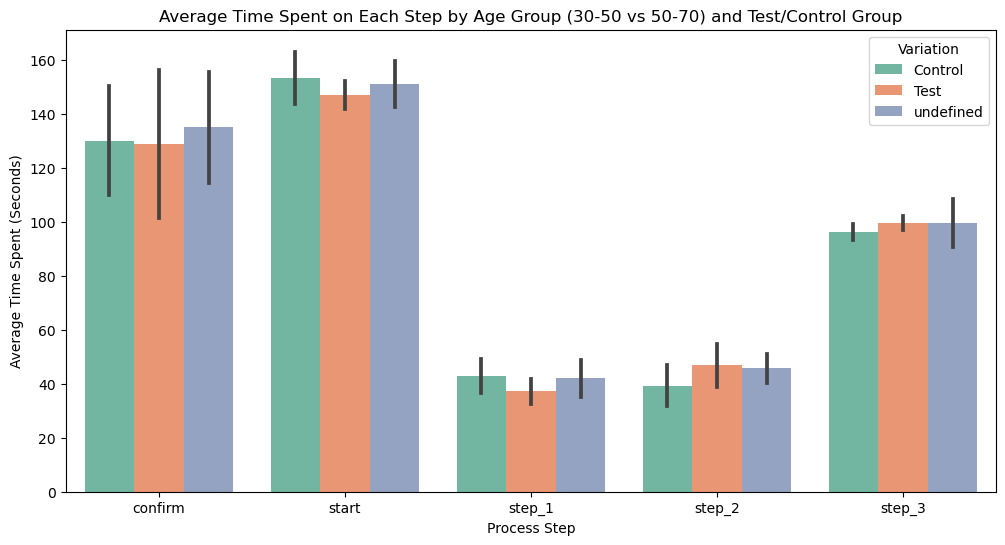

In [13]:
# Visualize the time spent on each step by age group and variation
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='time_diff', hue='Variation', data=avg_time_by_group_age, palette='Set2')
plt.title('Average Time Spent on Each Step by Age Group (30-50 vs 50-70) and Test/Control Group')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (Seconds)')
plt.legend(title='Variation')
plt.show()

In [14]:
# Identify users who reached the 'confirm' step
df_sorted['completed'] = df_sorted['process_step'] == 'confirm'

# Calculate the completion rate by variation and age group
completion_rate = df_sorted.groupby(['Variation', 'age_group'])['completed'].mean().reset_index()
display(completion_rate)

,Variation,age_group,completed
0,Control,30-50,0.157369
1,Control,50-70,0.148531
2,Test,30-50,0.172759
3,Test,50-70,0.146320
4,undefined,30-50,0.165239
5,undefined,50-70,0.144391


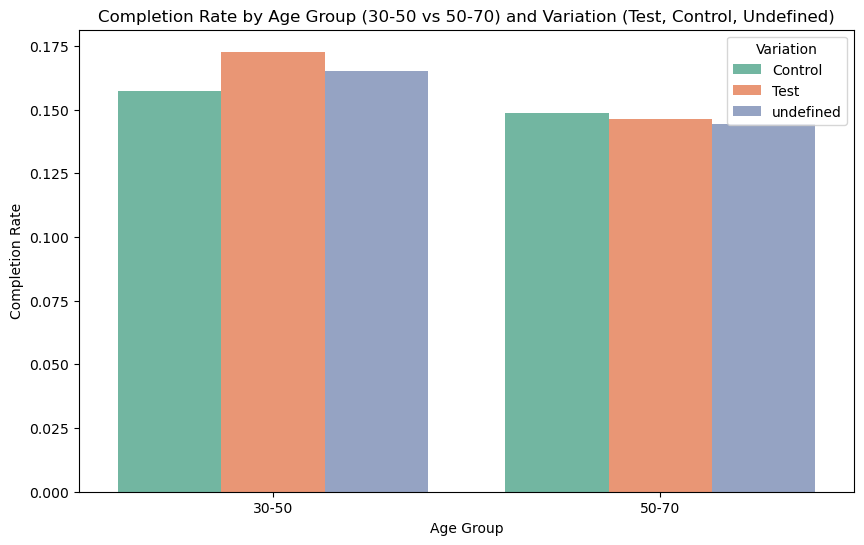

In [15]:
# Visualize the completion rate by variation and age group
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='completed', hue='Variation', data=completion_rate, palette='Set2')
plt.title('Completion Rate by Age Group (30-50 vs 50-70) and Variation (Test, Control, Undefined)')
plt.ylabel('Completion Rate')
plt.xlabel('Age Group')
plt.legend(title='Variation')
plt.show()

#### Test stat for completion rate by variation and age group

In [16]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# Assuming the dataset is loaded correctly
# Group the data by age group and Variation (Test, Control)
df_filtered = df[(df['clnt_age'] >= 30) & (df['clnt_age'] <= 70)]
df_filtered['age_group'] = pd.cut(df_filtered['clnt_age'], bins=[30, 50, 70], labels=['30-50', '50-70'])

# 30-50 Age Group
test_30_50 = df_filtered[(df_filtered['Variation'] == 'Test') & (df_filtered['age_group'] == '30-50')]
control_30_50 = df_filtered[(df_filtered['Variation'] == 'Control') & (df_filtered['age_group'] == '30-50')]

# 50-70 Age Group
test_50_70 = df_filtered[(df_filtered['Variation'] == 'Test') & (df_filtered['age_group'] == '50-70')]
control_50_70 = df_filtered[(df_filtered['Variation'] == 'Control') & (df_filtered['age_group'] == '50-70')]

# Count the number of completions (assuming 'process_step' = 'confirm' means completion)
test_completed_30_50 = test_30_50[test_30_50['process_step'] == 'confirm'].shape[0]
control_completed_30_50 = control_30_50[control_30_50['process_step'] == 'confirm'].shape[0]

test_completed_50_70 = test_50_70[test_50_70['process_step'] == 'confirm'].shape[0]
control_completed_50_70 = control_50_70[control_50_70['process_step'] == 'confirm'].shape[0]

# Total number of users in each group
test_total_30_50 = test_30_50['client_id'].nunique()
control_total_30_50 = control_30_50['client_id'].nunique()

test_total_50_70 = test_50_70['client_id'].nunique()
control_total_50_70 = control_50_70['client_id'].nunique()

# Z-test for 30-50 Age Group
count_30_50 = [test_completed_30_50, control_completed_30_50]
nobs_30_50 = [test_total_30_50, control_total_30_50]
z_stat_30_50, p_value_30_50 = proportions_ztest(count_30_50, nobs_30_50)

print(f"30-50 Age Group - Z-statistic: {z_stat_30_50}, P-value: {p_value_30_50}")

# Z-test for 50-70 Age Group
count_50_70 = [test_completed_50_70, control_completed_50_70]
nobs_50_70 = [test_total_50_70, control_total_50_70]
z_stat_50_70, p_value_50_70 = proportions_ztest(count_50_70, nobs_50_70)

print(f"50-70 Age Group - Z-statistic: {z_stat_50_70}, P-value: {p_value_50_70}")

# Interpretation of results
if p_value_30_50 < 0.05:
    print("For the 30-50 age group, we reject the null hypothesis: There is a significant difference in completion rates.")
else:
    print("For the 30-50 age group, we fail to reject the null hypothesis: No significant difference in completion rates.")

if p_value_50_70 < 0.05:
    print("For the 50-70 age group, we reject the null hypothesis: There is a significant difference in completion rates.")
else:
    print("For the 50-70 age group, we fail to reject the null hypothesis: No significant difference in completion rates.")


30-50 Age Group - Z-statistic: 30.450202986010947, P-value: 1.190511818266119e-203
50-70 Age Group - Z-statistic: 51.06809050017536, P-value: 0.0
For the 30-50 age group, we reject the null hypothesis: There is a significant difference in completion rates.
For the 50-70 age group, we reject the null hypothesis: There is a significant difference in completion rates.


C:\Users\joelk\AppData\Local\Temp\ipykernel_41100\2169389597.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['age_group'] = pd.cut(df_filtered['clnt_age'], bins=[30, 50, 70], labels=['30-50', '50-70'])


### Time Spent per step with comparison by Age Group

In [17]:
# Define the age bins
age_bins = [30, 50, 70]
age_labels = ['30-50', '50-70']

# Create a new column for age group
df['age_group'] = pd.cut(df['clnt_age'], bins=age_bins, labels=age_labels, right=False)

# Filter the data for age groups 30-50 and 50-70
filtered_df = df[df['age_group'].isin(['30-50', '50-70'])]
display(filtered_df)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,year,date,time,age_group
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13,1970-01-01 00:00:00.000002017,2017-04-02,2024-09-12 11:51:13,50-70
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50,1970-01-01 00:00:00.000002017,2017-04-02,2024-09-12 11:47:50,50-70
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,1970-01-01 00:00:00.000002017,2017-04-02,2024-09-12 11:46:45,50-70
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08,1970-01-01 00:00:00.000002017,2017-04-02,2024-09-12 11:23:08,50-70
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,1970-01-01 00:00:00.000002017,2017-04-02,2024-09-12 11:22:24,50-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449699,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,undefined,962766819_57063135389,158544612_4105226940_43043,confirm,2017-04-05 11:48:02,1970-01-01 00:00:00.000002017,2017-04-05,2024-09-12 11:48:02,50-70
449700,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,undefined,962766819_57063135389,158544612_4105226940_43043,step_3,2017-04-05 11:44:07,1970-01-01 00:00:00.000002017,2017-04-05,2024-09-12 11:44:07,50-70
449701,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,undefined,962766819_57063135389,158544612_4105226940_43043,step_2,2017-04-05 11:43:10,1970-01-01 00:00:00.000002017,2017-04-05,2024-09-12 11:43:10,50-70
449702,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,undefined,962766819_57063135389,884309593_49820690623_654151,step_1,2017-04-05 11:41:32,1970-01-01 00:00:00.000002017,2017-04-05,2024-09-12 11:41:32,50-70


In [18]:
# Ensure the date_time column is in datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Sort the data by client_id, visit_id, and date_time
df_sorted = filtered_df.sort_values(by=['client_id', 'visit_id', 'date_time'])

# Calculate time differences for each client between steps (in seconds)
df_sorted['time_diff'] = df_sorted.groupby(['client_id', 'visit_id'])['date_time'].diff().dt.total_seconds()

# Drop the first occurrence where time_diff is NaN
df_sorted.dropna(subset=['time_diff'], inplace=True)

In [19]:
display(df_sorted)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,year,date,time,age_group,time_diff
381111,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,undefined,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 20:19:45,30-50,9.0
381110,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,undefined,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 20:20:31,30-50,46.0
381109,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,undefined,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 20:22:05,30-50,94.0
381108,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,undefined,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 20:23:09,30-50,64.0
9748,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 15:41:35,50-70,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310095,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,1970-01-01 00:00:00.000002017,2017-05-08,2024-09-12 16:08:40,30-50,10.0
310094,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,1970-01-01 00:00:00.000002017,2017-05-08,2024-09-12 16:09:19,30-50,39.0
310093,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,1970-01-01 00:00:00.000002017,2017-05-08,2024-09-12 16:09:40,30-50,21.0
310087,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,1970-01-01 00:00:00.000002017,2017-04-05,2024-09-12 13:41:04,30-50,15.0


In [20]:
# Set the correct order for process_step
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
df_sorted['process_step'] = pd.Categorical(df_sorted['process_step'], categories=step_order, ordered=True)

In [21]:
# Group by gender, age group, and process step to calculate mean time spent
avg_time_by_group = df_sorted.groupby(['gendr', 'age_group', 'process_step'])['time_diff'].mean().reset_index()

# Rename columns for clarity
avg_time_by_group.rename(columns={'time_diff': 'avg_time_spent'}, inplace=True)

C:\Users\joelk\.conda\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\joelk\.conda\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\joelk\.conda\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\joelk\.conda\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\joelk\.conda\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\joelk\.conda\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


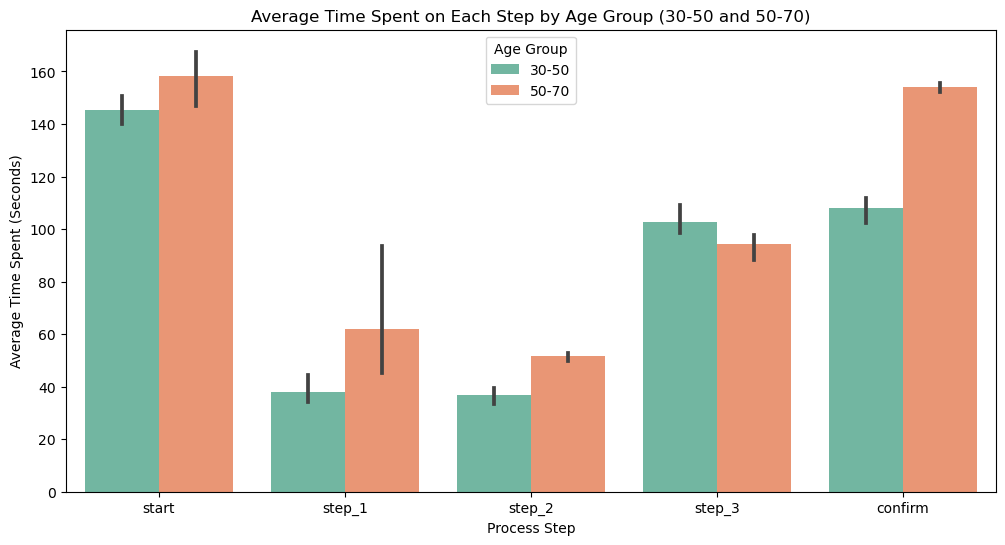

In [22]:
# Bar plot to visualize average time spent by age group and process step
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='avg_time_spent', hue='age_group', data=avg_time_by_group, palette='Set2')
plt.title('Average Time Spent on Each Step by Age Group (30-50 and 50-70)')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (Seconds)')
plt.legend(title='Age Group')
plt.show()

#### Hypothesis for Time Spent by Age Group

##### - Null Hypothesis (H₀): There is no significant difference in the time spent on each process step between the 30-50 and 50-70 age groups.
##### - Alternative Hypothesis (H₁): There is a significant difference in the time spent on each process step between the 30-50 and 50-70 age groups.

In [54]:
import pandas as pd
import scipy.stats as stats

# Ensure that 'date_time' is in datetime format if not already
df['date_time'] = pd.to_datetime(df['date_time'])

# Calculate the time difference between steps for each user (in seconds)
df['time_diff'] = df.groupby('client_id')['date_time'].diff().dt.total_seconds()

# Filter out rows where 'time_diff' is NaN (i.e., the first step where there's no prior step to compare)
df_filtered = df.dropna(subset=['time_diff'])

# Perform ANOVA test for each process step to check if time spent differs between age groups
for step in df_filtered['process_step'].unique():
    step_data = df_filtered[df_filtered['process_step'] == step]
    
    # Run ANOVA for age groups 30-50 and 50-70
    f_stat, p_value = stats.f_oneway(
        step_data[step_data['age_group'] == '30-50']['time_diff'].dropna(),
        step_data[step_data['age_group'] == '50-70']['time_diff'].dropna()
    )
    
    print(f"Process Step: {step} - F-statistic: {f_stat}, P-value: {p_value}")
    
    # Interpret the result
    if p_value < 0.05:
        print(f"Reject the null hypothesis: Significant difference in time spent on {step} between age groups.\n")
    else:
        print(f"Fail to reject the null hypothesis: No significant difference in time spent on {step} between age groups.\n")


Process Step: confirm - F-statistic: 0.12899122435614968, P-value: 0.7194849414633349
Fail to reject the null hypothesis: No significant difference in time spent on confirm between age groups.

Process Step: step_3 - F-statistic: 4.632515014117374, P-value: 0.03137651040602614
Reject the null hypothesis: Significant difference in time spent on step_3 between age groups.

Process Step: step_2 - F-statistic: 0.8304228418430982, P-value: 0.36215407867242466
Fail to reject the null hypothesis: No significant difference in time spent on step_2 between age groups.

Process Step: step_1 - F-statistic: 11.333454101961099, P-value: 0.0007616544336872076
Reject the null hypothesis: Significant difference in time spent on step_1 between age groups.

Process Step: start - F-statistic: 23.40692206160331, P-value: 1.3130733611357506e-06
Reject the null hypothesis: Significant difference in time spent on start between age groups.



In [23]:
# Exporting data to CSV for Tableau
df_sorted[['client_id', 'visitor_id', 'gendr', 'age_group', 'process_step', 'time_diff']].to_csv('time_spent_per_step.csv', index=False)

### Time Spent per Step comparing Tested&Controlled Groups and by Age

In [24]:
# Filter only for Test group
df_test = df_sorted[df_sorted['Variation'] == 'Test']

# Group by age group and process step to calculate average time spent
avg_time_by_test_group = df_test.groupby(['age_group', 'process_step'])['time_diff'].mean().reset_index()

# Rename columns for clarity
avg_time_by_test_group.rename(columns={'time_diff': 'avg_time_spent'}, inplace=True)

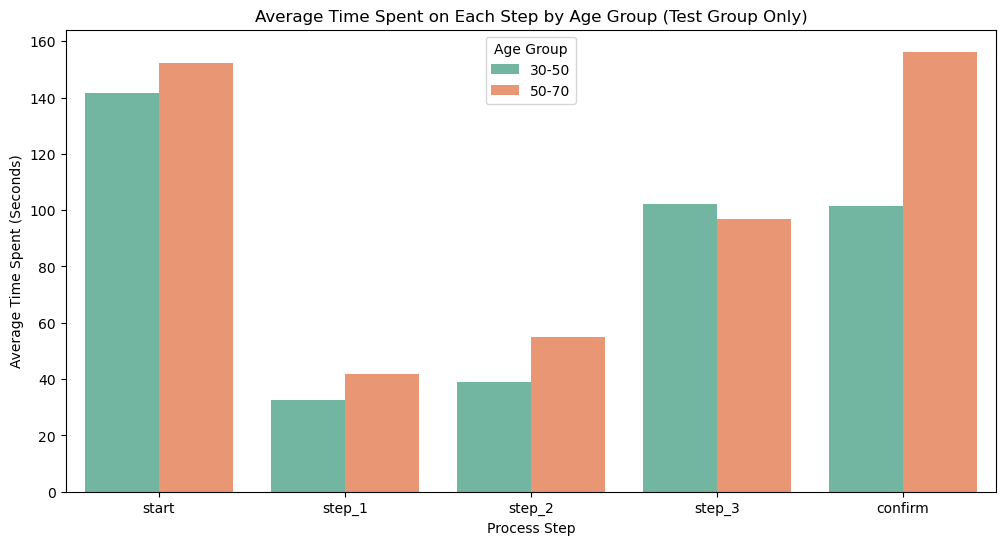

In [25]:
# Bar plot to visualize average time spent by age group and process step for Test group only
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='avg_time_spent', hue='age_group', data=avg_time_by_test_group, palette='Set2')
plt.title('Average Time Spent on Each Step by Age Group (Test Group Only)')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (Seconds)')
plt.legend(title='Age Group')
plt.show()

In [ ]:
####

In [53]:
import scipy.stats as stats

# Perform ANOVA test for each process step to check if time spent differs between age groups
for step in df_test['process_step'].unique():
    step_data = df_test[df_test['process_step'] == step]
    
    # Run ANOVA for age groups 30-50 and 50-70 in the Test group
    f_stat, p_value = stats.f_oneway(
        step_data[step_data['age_group'] == '30-50']['time_diff'].dropna(),
        step_data[step_data['age_group'] == '50-70']['time_diff'].dropna()
    )
    
    print(f"Process Step: {step} - F-statistic: {f_stat}, P-value: {p_value}")
    
    # Interpretation
    if p_value < 0.05:
        print(f"Reject the null hypothesis: Significant difference in time spent on {step} between age groups.\n")
    else:
        print(f"Fail to reject the null hypothesis: No significant difference in time spent on {step} between age groups.\n")


Process Step: step_1 - F-statistic: 63.64720104166522, P-value: 1.5420780798452846e-15
Reject the null hypothesis: Significant difference in time spent on step_1 between age groups.

Process Step: step_2 - F-statistic: 152.25687788474372, P-value: 7.136259351927715e-35
Reject the null hypothesis: Significant difference in time spent on step_2 between age groups.

Process Step: step_3 - F-statistic: 8.485293454170854, P-value: 0.0035843325166327344
Reject the null hypothesis: Significant difference in time spent on step_3 between age groups.

Process Step: confirm - F-statistic: 250.77140571256683, P-value: 4.433764374060548e-56
Reject the null hypothesis: Significant difference in time spent on confirm between age groups.

Process Step: start - F-statistic: 3.732507405569058, P-value: 0.05337856112786968
Fail to reject the null hypothesis: No significant difference in time spent on start between age groups.



In [26]:
# Filter only for Control group
df_control = df_sorted[df_sorted['Variation'] == 'Control']

# Group by age group and process step to calculate average time spent
avg_time_by_control_group = df_control.groupby(['age_group', 'process_step'])['time_diff'].mean().reset_index()

# Rename columns for clarity
avg_time_by_control_group.rename(columns={'time_diff': 'avg_time_spent'}, inplace=True)

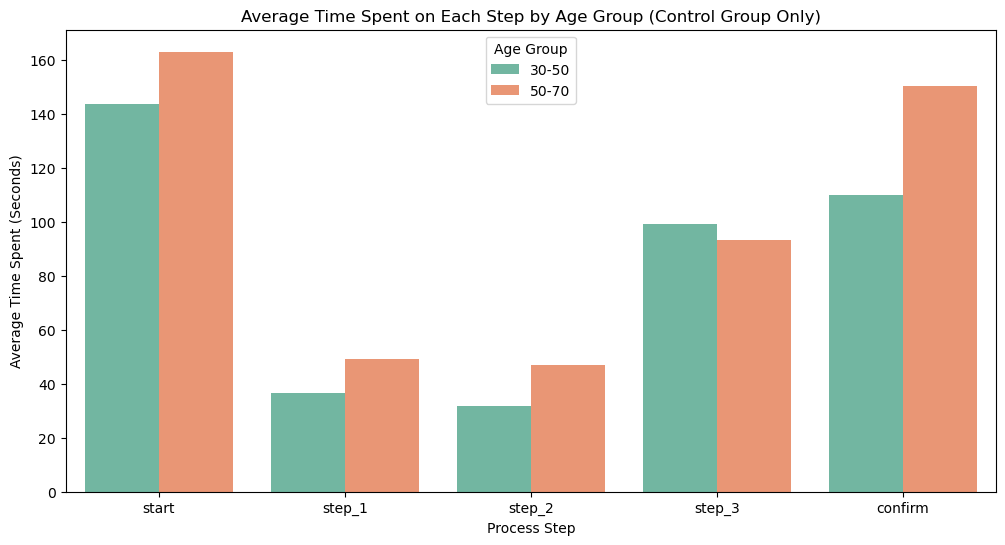

In [27]:
# Bar plot to visualize average time spent by age group and process step for Control group only
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='avg_time_spent', hue='age_group', data=avg_time_by_control_group, palette='Set2')
plt.title('Average Time Spent on Each Step by Age Group (Control Group Only)')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (Seconds)')
plt.legend(title='Age Group')
plt.show()

### Time Spent on Each Steps by Gender


In [28]:
# Group by gender and process step to calculate average time spent for Test group
avg_time_by_gender_test = df_test.groupby(['gendr', 'process_step'])['time_diff'].mean().reset_index()

# Rename columns for clarity
avg_time_by_gender_test.rename(columns={'time_diff': 'avg_time_spent'}, inplace=True)

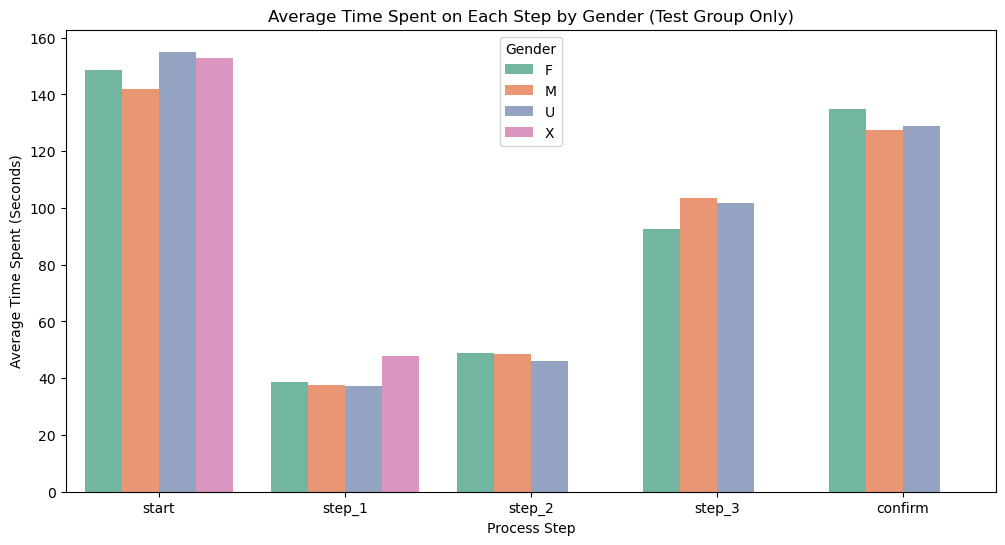

In [29]:
# Bar plot to visualize average time spent by gender and process step for Test group only
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='avg_time_spent', hue='gendr', data=avg_time_by_gender_test, palette='Set2')
plt.title('Average Time Spent on Each Step by Gender (Test Group Only)')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (Seconds)')
plt.legend(title='Gender')
plt.show()

In [55]:
import scipy.stats as stats

# Perform ANOVA test for each process step to check if time spent differs between genders
for step in df_test['process_step'].unique():
    step_data = df_test[df_test['process_step'] == step]
    
    # Run ANOVA for gender groups in the Test group
    f_stat, p_value = stats.f_oneway(
        step_data[step_data['gendr'] == 'M']['time_diff'].dropna(),
        step_data[step_data['gendr'] == 'F']['time_diff'].dropna(),
        step_data[step_data['gendr'] == 'U']['time_diff'].dropna(),
        step_data[step_data['gendr'] == 'X']['time_diff'].dropna()
    )
    
    print(f"Process Step: {step} - F-statistic: {f_stat}, P-value: {p_value}\n")
    
    # Interpretation
    if p_value < 0.05:
        print(f"Reject the null hypothesis: Significant difference in time spent on {step} between genders.\n")
    else:
        print(f"Fail to reject the null hypothesis: No significant difference in time spent on {step} between genders.\n")


Process Step: step_1 - F-statistic: 0.4277260445246883, P-value: 0.7331328925093981

Fail to reject the null hypothesis: No significant difference in time spent on step_1 between genders.

Process Step: step_2 - F-statistic: nan, P-value: nan

Fail to reject the null hypothesis: No significant difference in time spent on step_2 between genders.

Process Step: step_3 - F-statistic: nan, P-value: nan

Fail to reject the null hypothesis: No significant difference in time spent on step_3 between genders.

Process Step: confirm - F-statistic: nan, P-value: nan

Fail to reject the null hypothesis: No significant difference in time spent on confirm between genders.

Process Step: start - F-statistic: 1.2430889501327769, P-value: 0.29225448843027246

Fail to reject the null hypothesis: No significant difference in time spent on start between genders.



C:\Users\joelk\.conda\Lib\site-packages\scipy\stats\_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [30]:
# Group by gender and process step to calculate average time spent for Control group
avg_time_by_gender_control = df_control.groupby(['gendr', 'process_step'])['time_diff'].mean().reset_index()

# Rename columns for clarity
avg_time_by_gender_control.rename(columns={'time_diff': 'avg_time_spent'}, inplace=True)

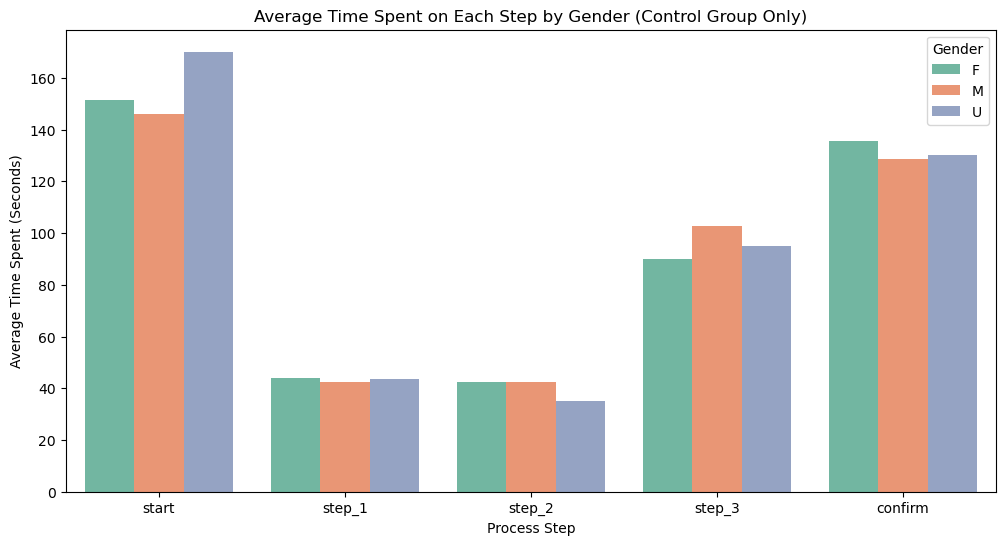

In [31]:
# Bar plot to visualize average time spent by gender and process step for Control group only
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='avg_time_spent', hue='gendr', data=avg_time_by_gender_control, palette='Set2')
plt.title('Average Time Spent on Each Step by Gender (Control Group Only)')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (Seconds)')
plt.legend(title='Gender')
plt.show()

---

# Customer Error Analysis

### Error Rate Test vs Control Groups

In [32]:
# Rename process steps as numerical values for easier comparison
step_mapping = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
df_sorted['step_numeric'] = df_sorted['process_step'].map(step_mapping).astype(int)

# Identify errors (reversions to a lower step)
df_sorted['step_diff'] = df_sorted.groupby(['client_id', 'visit_id'])['step_numeric'].diff()
df_sorted['error'] = df_sorted['step_diff'] < 0  # Step difference is negative (reversion)

# Group by Variation (Control/Test) to calculate the mean error rate
avg_error_rate_by_group = df_sorted.groupby('Variation')['error'].mean().reset_index()
display(avg_error_rate_by_group)

,Variation,error
0,Control,0.084778
1,Test,0.115218
2,undefined,0.104124


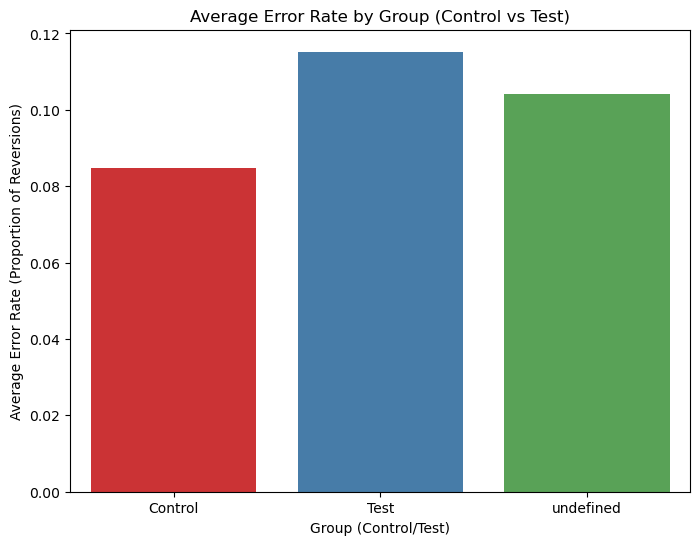

In [33]:
# Plotting the average error rates for Control vs Test groups
plt.figure(figsize=(8, 6))
sns.barplot(x='Variation', y='error', data=avg_error_rate_by_group, palette='Set1')
plt.title('Average Error Rate by Group (Control vs Test)')
plt.xlabel('Group (Control/Test)')
plt.ylabel('Average Error Rate (Proportion of Reversions)')
plt.show()

### Error Rate on each step

In [34]:
# Group by process step and calculate the error rate
error_rate_by_step = df_sorted.groupby(['process_step'])['error'].mean().reset_index()
display(error_rate_by_step)

# Calculate the overall average error rate
overall_avg_error_rate = df_sorted['error'].mean()
display(overall_avg_error_rate)

,process_step,error
0,start,0.377815
1,step_1,0.083952
2,step_2,0.080570
3,step_3,0.003495
4,confirm,0.000000


0.1024295461621273

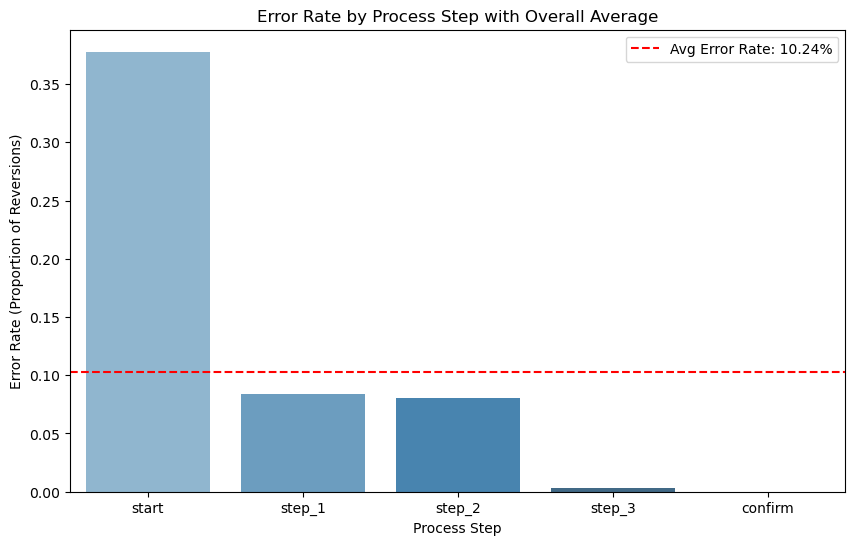

In [35]:
# Plotting the error rate by process step
plt.figure(figsize=(10, 6))
sns.barplot(x='process_step', y='error', data=error_rate_by_step, palette='Blues_d')
plt.axhline(overall_avg_error_rate, color='red', linestyle='--', label=f'Avg Error Rate: {overall_avg_error_rate:.2%}')
plt.title('Error Rate by Process Step with Overall Average')
plt.xlabel('Process Step')
plt.ylabel('Error Rate (Proportion of Reversions)')
plt.legend()
plt.show()

In [36]:
# Ensure step_numeric is correctly mapped
step_mapping = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
df_sorted['step_numeric'] = df_sorted['process_step'].map(step_mapping).astype(int)

# Identify errors (reversions to a lower step)
df_sorted['step_diff'] = df_sorted.groupby(['client_id', 'visit_id'])['step_numeric'].diff()
df_sorted['error'] = df_sorted['step_diff'] < 0  # Step difference is negative (reversion)

In [37]:
df_sorted.to_csv('df_sorted.csv', index=False)

In [38]:
# Separate data into Control and Test groups
df_control = df_sorted[df_sorted['Variation'] == 'Control']
display(df_control)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,...,process_step,date_time,year,date,time,age_group,time_diff,step_numeric,step_diff,error
302414,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,...,step_1,2017-04-08 18:52:17,1970-01-01 00:00:00.000002017,2017-04-08,2024-09-12 18:52:17,30-50,49.0,1,NaN,False
302413,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,...,step_1,2017-04-08 18:53:20,1970-01-01 00:00:00.000002017,2017-04-08,2024-09-12 18:53:20,30-50,63.0,1,0.0,False
302412,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,...,step_2,2017-04-08 18:53:29,1970-01-01 00:00:00.000002017,2017-04-08,2024-09-12 18:53:29,30-50,9.0,2,1.0,False
302411,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,...,step_3,2017-04-08 18:58:04,1970-01-01 00:00:00.000002017,2017-04-08,2024-09-12 18:58:04,30-50,275.0,3,1.0,False
302410,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,...,step_1,2017-04-08 18:59:55,1970-01-01 00:00:00.000002017,2017-04-08,2024-09-12 18:59:55,30-50,111.0,1,-2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142960,9998346,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,Control,...,step_2,2017-03-29 15:30:11,1970-01-01 00:00:00.000002017,2017-03-29,2024-09-12 15:30:11,50-70,16.0,2,1.0,False
142959,9998346,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,Control,...,step_3,2017-03-29 15:30:25,1970-01-01 00:00:00.000002017,2017-03-29,2024-09-12 15:30:25,50-70,14.0,3,1.0,False
142956,9998346,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,Control,...,step_3,2017-03-29 15:37:28,1970-01-01 00:00:00.000002017,2017-03-29,2024-09-12 15:37:28,50-70,423.0,3,0.0,False
142957,9998346,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0,Control,...,confirm,2017-03-29 15:37:28,1970-01-01 00:00:00.000002017,2017-03-29,2024-09-12 15:37:28,50-70,0.0,4,1.0,False


In [39]:
df_control.to_csv('df_control.csv', index=False)

In [40]:
df_test = df_sorted[df_sorted['Variation'] == 'Test']
display(df_test)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,...,process_step,date_time,year,date,time,age_group,time_diff,step_numeric,step_diff,error
9748,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,...,step_1,2017-04-12 15:41:35,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 15:41:35,50-70,7.0,1,NaN,False
9747,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,...,step_2,2017-04-12 15:41:53,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 15:41:53,50-70,18.0,2,1.0,False
9746,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,...,step_3,2017-04-12 15:45:02,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 15:45:02,50-70,189.0,3,1.0,False
9745,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,...,confirm,2017-04-12 15:47:45,1970-01-01 00:00:00.000002017,2017-04-12,2024-09-12 15:47:45,50-70,163.0,4,1.0,False
83828,934,9.0,109.0,51.0,F,2.0,32522.88,0.0,3.0,Test,...,start,2017-04-18 02:37:02,1970-01-01 00:00:00.000002017,2017-04-18,2024-09-12 02:37:02,50-70,32.0,0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310095,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,...,step_2,2017-05-08 16:08:40,1970-01-01 00:00:00.000002017,2017-05-08,2024-09-12 16:08:40,30-50,10.0,2,1.0,False
310094,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,...,step_3,2017-05-08 16:09:19,1970-01-01 00:00:00.000002017,2017-05-08,2024-09-12 16:09:19,30-50,39.0,3,1.0,False
310093,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,...,confirm,2017-05-08 16:09:40,1970-01-01 00:00:00.000002017,2017-05-08,2024-09-12 16:09:40,30-50,21.0,4,1.0,False
310087,9999729,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,...,step_1,2017-04-05 13:41:04,1970-01-01 00:00:00.000002017,2017-04-05,2024-09-12 13:41:04,30-50,15.0,1,NaN,False


In [41]:
df_test.to_csv('df_test.csv', index=False)

In [42]:
# Calculate average error rates by process step for both groups
error_rate_by_step_control = df_sorted[df_sorted['Variation'] == 'Control'].groupby('process_step')['error'].mean().reset_index()
display(error_rate_by_step_control)

,process_step,error
0,start,0.283903
1,step_1,0.078402
2,step_2,0.088439
3,step_3,0.005488
4,confirm,0.000000


In [43]:
error_rate_by_step_test = df_sorted[df_sorted['Variation'] == 'Test'].groupby('process_step')['error'].mean().reset_index()
display(error_rate_by_step_test)

,process_step,error
0,start,0.442030
1,step_1,0.087564
2,step_2,0.072375
3,step_3,0.001174
4,confirm,0.000000


NameError: name 'overall_avg_control' is not defined

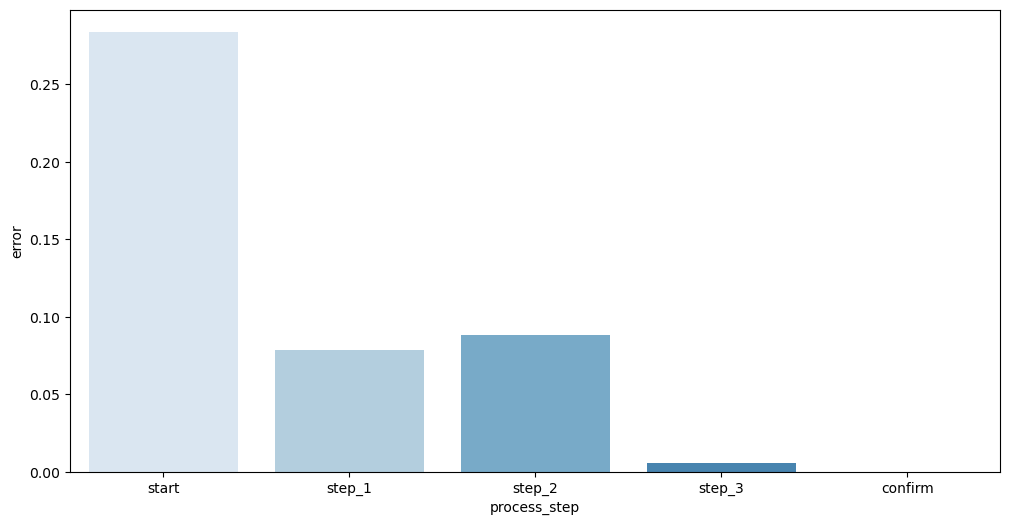

In [44]:
# Plot for Control Group
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='error', data=error_rate_by_step_control, palette='Blues')
plt.axhline(overall_avg_control, color='red', linestyle='--', label=f'Overall Average: {overall_avg_control:.2%}')
plt.title('Error Rate by Process Step - Control Group')
plt.xlabel('Process Step')
plt.ylabel('Error Rate (Proportion of Reversions)')
plt.legend()
plt.show()

In [ ]:
# Plot for Test Group
plt.figure(figsize=(12, 6))
sns.barplot(x='process_step', y='error', data=error_rate_by_step_test, palette='Greens')
plt.axhline(overall_avg_test, color='red', linestyle='--', label=f'Overall Average: {overall_avg_test:.2%}')
plt.title('Error Rate by Process Step - Test Group')
plt.xlabel('Process Step')
plt.ylabel('Error Rate (Proportion of Reversions)')
plt.legend()
plt.show()

In [ ]:
# Ensure the age groups are correctly defined as 30-50 and 50-70
age_bins = [30, 50, 70]
age_labels = ['30-50', '50-70']

# Assign age groups
df_sorted['age_group'] = pd.cut(df_sorted['clnt_age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the average error rates by age group and gender
error_rate_by_age_gender = df_sorted.groupby(['age_group', 'gendr'])['error'].mean().reset_index()

# Rename columns for clarity
error_rate_by_age_gender.rename(columns={'error': 'avg_error_rate'}, inplace=True)

In [ ]:
# Plot the error rates by age group and gender
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='avg_error_rate', hue='gendr', data=error_rate_by_age_gender, palette='Set2')
plt.title('Average Error Rate by Age Group (30-50 and 50-70) and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Error Rate (Proportion of Reversions)')
plt.legend(title='Gender')
plt.show()

### Error rates by num_accts, and variation

In [ ]:
# Calculate error rates by num_accts, and variation (Test/Control)
error_rate_by_accts = df_sorted.groupby(['age_group', 'num_accts', 'Variation'])['error'].mean().reset_index()
display(error_rate_by_accts)

In [ ]:
# Visualize the error rates by number of accounts, age group, and variation
plt.figure(figsize=(12, 6))
sns.barplot(x='num_accts', y='error', hue='Variation', data=error_rate_by_accts, palette='coolwarm')
plt.title('Error Rates by Number of Accounts, Age Group, and Test/Control Group')
plt.xlabel('Number of Accounts')
plt.ylabel('Error Rate (Proportion of Reversions)')
plt.legend(title='Variation')
plt.show()

### Hypothesis testing

#### Completion rate between older and young grounp

In [60]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# Define age groups
older_users = df[df['clnt_age'] >= 50]
younger_users = df[df['clnt_age'] < 50]

# Count completed cases (assuming 'process_step' = 'confirm' means completion)
older_completed = older_users[older_users['process_step'] == 'confirm'].shape[0]
younger_completed = younger_users[younger_users['process_step'] == 'confirm'].shape[0]

# Total number of users in each group
older_total = older_users['client_id'].nunique()
younger_total = younger_users['client_id'].nunique()

# Perform the Z-test for proportions
count = [older_completed, younger_completed]
nobs = [older_total, younger_total]
z_stat, p_value = proportions_ztest(count, nobs)

print(f"Z-statistic: {z_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Older people have a significantly different completion rate.")
else:
    print("Fail to reject the null hypothesis: No significant difference in completion rates between older and younger users.")


Z-statistic: 17.832912300931024, P-value: 3.924361822668444e-71
Reject the null hypothesis: Older people have a significantly different completion rate.


#### Time Spent Comparison between older and young grounp

In [61]:
import scipy.stats as stats

# Assuming time is already in the column `time_diff`
older_time_spent = older_users['time_diff'].dropna()
younger_time_spent = younger_users['time_diff'].dropna()

# Perform ANOVA to check for significant difference in time spent
f_stat, p_value = stats.f_oneway(older_time_spent, younger_time_spent)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in time spent between older and younger users.")
else:
    print("Fail to reject the null hypothesis: No significant difference in time spent between older and younger users.")


F-statistic: 190.34813262729512, P-value: 2.734157363432373e-43
Reject the null hypothesis: There is a significant difference in time spent between older and younger users.


### New website is better at every step

#### Completion Rate Comparison Between Test and Control

In [62]:
import scipy.stats as stats

# Assuming time is already in the column `time_diff`
older_time_spent = older_users['time_diff'].dropna()
younger_time_spent = younger_users['time_diff'].dropna()

# Perform ANOVA to check for significant difference in time spent
f_stat, p_value = stats.f_oneway(older_time_spent, younger_time_spent)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in time spent between older and younger users.")
else:
    print("Fail to reject the null hypothesis: No significant difference in time spent between older and younger users.")


F-statistic: 190.34813262729512, P-value: 2.734157363432373e-43
Reject the null hypothesis: There is a significant difference in time spent between older and younger users.


#### Time Spent Comparison Between Test and Control

In [64]:
# Filter for Test and Control groups
test_group = df[df['Variation'] == 'Test']
control_group = df[df['Variation'] == 'Control']

# Assuming time is already in the column `time_diff`
test_time_spent = test_group['time_diff'].dropna()
control_time_spent = control_group['time_diff'].dropna()

# Perform ANOVA to check for significant difference in time spent
import scipy.stats as stats
f_stat, p_value = stats.f_oneway(test_time_spent, control_time_spent)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in time spent between the new and old websites.")
else:
    print("Fail to reject the null hypothesis: No significant difference in time spent between the new and old websites.")


F-statistic: 33.24651287412206, P-value: 8.1273046714307e-09
Reject the null hypothesis: There is a significant difference in time spent between the new and old websites.


## OVERALL HYPOTHESIS TEST

### Older people are our ideal customer

#### Null Hypothesis (H₀): There is no significant difference in the completion rate between older (50+) and younger (<50) customers.

#### Alternative Hypothesis (H₁): There is a significant difference in the completion rate between older (50+) and younger (<50) customers.

In [67]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# Define age groups
older_users = df[df['clnt_age'] >= 50]
younger_users = df[df['clnt_age'] < 50]

# Count the number of completions (assuming 'process_step' = 'confirm' means completion)
older_completed = older_users[older_users['process_step'] == 'confirm'].shape[0]
younger_completed = younger_users[younger_users['process_step'] == 'confirm'].shape[0]

# Total number of users in each group
older_total = older_users['client_id'].nunique()
younger_total = younger_users['client_id'].nunique()

# Perform the Z-test for proportions
count = [older_completed, younger_completed]
nobs = [older_total, younger_total]
z_stat, p_value = proportions_ztest(count, nobs)

print(f"Z-statistic: {z_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Older customers have a significantly different completion rate.")
else:
    print("Fail to reject the null hypothesis: No significant difference in completion rates between older and younger customers.")


Z-statistic: 17.832912300931024, P-value: 3.924361822668444e-71
Reject the null hypothesis: Older customers have a significantly different completion rate.


### New website is better at every step

### Null Hypothesis (H₀): There is no significant difference in the time spent between the new website (Test group) and the old website (Control group).
### Alternative Hypothesis (H₁): There is a significant difference in the time spent between the new website (Test group) and the old website (Control group).

In [68]:
import scipy.stats as stats

# Filter for Test and Control groups
test_group = df[df['Variation'] == 'Test']
control_group = df[df['Variation'] == 'Control']

# Assuming time is already in the column `time_diff`
test_time_spent = test_group['time_diff'].dropna()
control_time_spent = control_group['time_diff'].dropna()

# Perform ANOVA to check for significant difference in time spent
f_stat, p_value = stats.f_oneway(test_time_spent, control_time_spent)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in time spent between the new and old websites.")
else:
    print("Fail to reject the null hypothesis: No significant difference in time spent between the new and old websites.")


F-statistic: 33.24651287412206, P-value: 8.1273046714307e-09
Reject the null hypothesis: There is a significant difference in time spent between the new and old websites.
